<a href="https://colab.research.google.com/github/xyvlin/machine_learning_hw/blob/main/adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [ ]:
class AdaBoost:
  def __init__(self, rounds):
    self.rounds = rounds
    self.a = []
    self.models = []
  def fit(self, X, y):
    n = X.shape[0]
    w = np.full(n,1/n)
    for j in range(self.rounds):
      model = DecisionTree()
      model.fit(X, y, w)
      pred = model.predict(X)
      err = w.dot(pred != y)+1e-10
      a = 0.5 * np.log((1 - err) / err)
      w = w * np.exp(-a * y * pred)
      w = w / w.sum()
      self.a.append(a)
      self.models.append(model)
  def predict(self, X):
    n = X.shape[0]
    pred = np.zeros(n)
    for i in range(self.rounds):
      pred += self.a[i] * self.models[i].predict(X)
    return np.sign(pred)

In [ ]:
class DecisionTree:
  def __init__(self):
    self.feature = None
    self.threshold = None
    self.direction = 1
  def fit(self, X, y, weight):
    n_samples, n_features = X.shape
    min_error = float('inf')
    for f in range(n_features):
      thresholds = np.unique(X[:,f])
      for t in thresholds:
        for d in [-1,1]:
          pred = np.ones(n_samples)
          pred[d*X[:,f] < d*t] *= -1
          err = np.sum(weight[y != pred])
          if err < min_error:
            min_error = err
            self.feature = f
            self.threshold = t
            self.direction = d
  def predict(self, X):
    n_samples = X.shape[0]
    pred = np.ones(n_samples)
    pred[self.direction * X[:,self.feature] < self.direction * self.threshold] = -1
    return pred

In [ ]:
X = pd.read_csv('/content/data_x.csv').values
y = pd.read_csv('/content/data_y.csv').values.flatten()
y[y==0]=-1
ada = AdaBoost(200)
ada.fit(X, y)
pred = ada.predict(X)

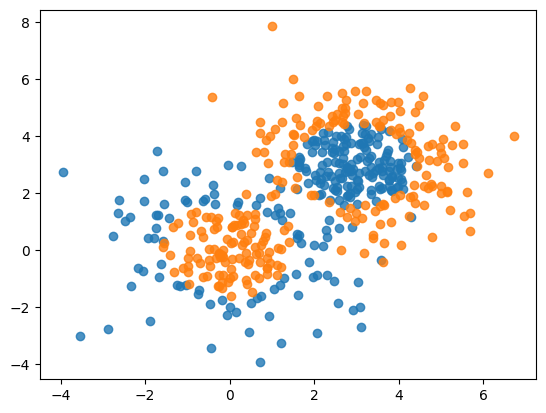

In [ ]:
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.8)
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Class 0', alpha=0.8)

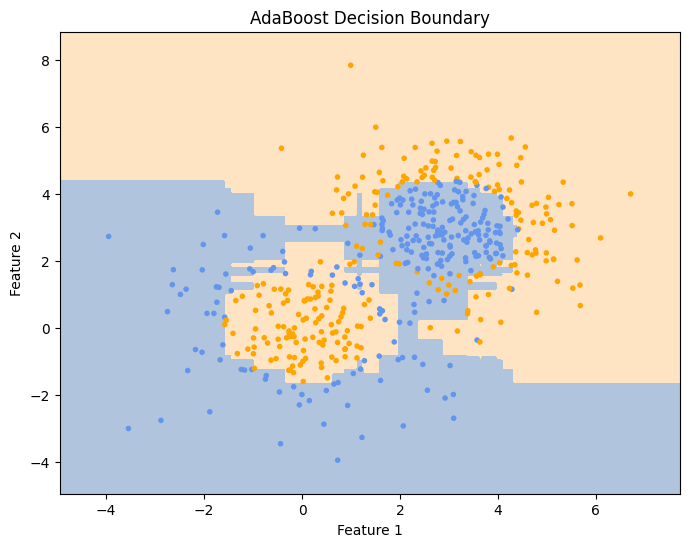

In [ ]:
from matplotlib.colors import ListedColormap

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = ada.predict(grid)
Z = (Z > 0).astype(int).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['bisque', 'lightsteelblue']))
plt.scatter(X[:, 0], X[:, 1], c=(y > 0).astype(int), cmap=ListedColormap(['orange', 'cornflowerblue']),marker='.')
plt.title("AdaBoost Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


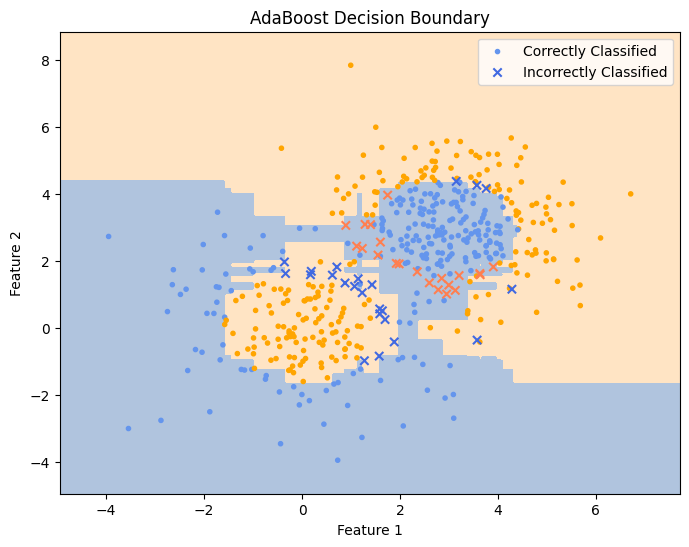

In [ ]:
from matplotlib.colors import ListedColormap

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = ada.predict(grid)
Z = (Z > 0).astype(int).reshape(xx.shape)

y_pred = ada.predict(X)
correct = (y_pred == y)
incorrect = ~correct

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['bisque', 'lightsteelblue']))

plt.scatter(X[correct, 0], X[correct, 1], c=(y[correct] > 0).astype(int), cmap=ListedColormap(['orange', 'cornflowerblue']), marker='.', label="Correctly Classified")

plt.scatter(X[incorrect, 0], X[incorrect, 1], c=(y[incorrect] > 0).astype(int), cmap=ListedColormap(['coral', 'royalblue']), marker='x', label="Incorrectly Classified")

plt.title("AdaBoost Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y,pred)

0.9118236472945892

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
a = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
a.fit(X,y)
pred = a.predict(X)
accuracy_score(y,pred)

0.8797595190380761